## 1.4

0. (a) Scientific computing is concerned with the development and study of numerical algorithms to solve problems. Numerical analysis can be viewed as the theory and implementation of such algorithms (like newton's method or secant approx.)

   (b) From the book, we may have 2 large numbers 99.99 and 100. The absolute difference is 0.01 while the relative error is 0.0001. Relative error is more suitable since it gives a clearer picture of the actual error. Absolute error is more relevant when certain tolerances need to be met. For instance, when an artillery round is fired, if the target is contained within the blast radius, it will be destroyed. |Error| < blast radius.

   (c) Discretization errors are a type of approximation error, which may be assessed by an analysis of the method used. Roundoff errors, however, are present in all calculations of real numbers and do not have a smooth structure that can be exploited.

   (d) When representing real numbers with infinite or very large decimal expansions, floating point numbers only have 53 mantissa bits to represent the decimal expansion (if its double precision). Therefore, continually doing arithmetic with many numbers that do not fit the double precision space will accumulate errors with the magnitude of the precision.

   (e) For any algorithm, it is important to be able to pinpoint the magnitude of error to be expected otherwise known as the accuracy. An algorithm's efficiency is measured by theoretical measures such as rate of convergence or determined by the hardware it is run on. The robustness of an algorithm can be measured by the rate of accumulation of errors in computation.
   
   (f) Take a degree n polynomial as follows:
   $$
   p_{n}(x) = c_{0} + c_{1}x + \dots + c_{n}x^n
   $$
   Then its nested form is given by:
   $$
   p_{n}(x) = (\dots((c_{n}x + c_{n-1})x + c_{n-2})x\dots)x + c_{0}
   $$
   To calculate a single point on the function with the unnested form, the computer must multiply n terms then add n terms for a total of n iterations, yielding a O(n^2) run time efficiency.
   With the nested form, however, the need to iterate n times over the function is eliminated because each additional degree only adds 2 more computations.
   For n = 1,
   $$
   p(x) = (c_{1}x + c_{0})
   $$
   Only 2 computations, multiplication and addition are performed.
   For n+1 degrees, we get:
   $$
   p_{n+1}(x) = (p_{n}(x))x + c_{0}
   $$
   We can see that for each increment to n, 2 more computations are required. Thus, for a nested polynomial of degree n, 2n computations are required.

   (e) A problem can be ill-conditioned (where small deviations in input lead to exponentially large output deviations) or well-conditioned (deviations are proportional). In order for an algorithm to be stable (where the growth of error terms is constant), the problem it must compute should be well-conditioned.
   

2. We can derive an approximation of $f^\prime(x)$ at $x_{0}$ using the Taylor series expansion as follows:
$$
f(x_{0}+h) = f(x_{0}) + hf^\prime(x_{0}) + {h^2\over 2}f^{\prime\prime}(x_{0}) + {h^3\over 6}f^{\prime\prime\prime}(x_{0}) + \dots
$$
Then
$$
f(x_{0}-h) = f(x_{0}) - hf^\prime(x_{0}) + {h^2\over 2}f^{\prime\prime}(x_{0}) - {h^3\over 6}f^{\prime\prime\prime}(x_{0}) + \dots
$$
and the discretization error
$$
f^\prime(x_{0}) = {f(x_{0}+h) - f(x_{0}-h)\over 2h}-({h}f^{\prime\prime}(x_{0}) - {h^2\over 3}f^{\prime\prime\prime}(x_{0}) + \dots)
$$
$$
|f^\prime(x_{0})-{f(x_{0}+h) - f(x_{0}-h)\over 2h}| \approx |{h}f^{\prime\prime}(x_{0}) - {h^2\over 3}f^{\prime\prime\prime}(x_{0}) + \dots|
$$
for small h, we can estimate this error as ${-h^2\over 3}|f^{\prime\prime}(x_{0})|$ with a $O(h^2)$.

## 2.5

11. (a)
$$
ln(x-\sqrt{x^2-1}) = -ln(x+\sqrt{x^2-1})
$$
$$
ln(x-\sqrt{x^2-1}) + ln(x+\sqrt{x^2-1}) = 0
$$
$$
ln((x-\sqrt{x^2-1})(x+\sqrt{x^2-1})) = 0
$$
$$
ln(x^2-(x^2-1)) = ln(1) = 0
$$

    (b)
    From the plot below, we can see that the roundoff errors begin to accumulate substantially around x=7 or so. The formula that is better suited to numerical computation is l(x) because it avoids the cancellation errors from values close to and above 1.

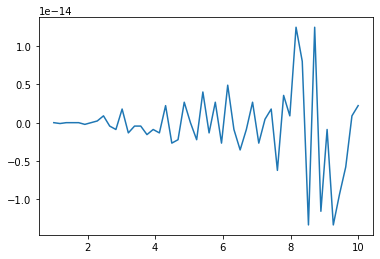

In [2]:
import math,numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.log(x-np.sqrt(np.power(x,2)-1))
l = lambda x: -np.log(x+np.sqrt(np.power(x,2)-1))

x = np.linspace(1,10)
err = f(x)-l(x)
plt.plot(x,err)

17. (a)

In [119]:
sum = .0
for i in np.linspace(1,10000,10000):
    sum += 1/i
sum

9.787606036044348

(b)

In [141]:
sum = .0
for i in np.linspace(1,10000,10000):
    sum += (1/i).round(5)
sum

9.787119999999932

(c)
Using 64 bit floating point arithmetic, our sum is very accurate. Rounding to 5 places, however, only generates correct digits up to the 3rd decimal place starting at 1 and 10000. The difference between values starting at 10000 and 1 can likely be attributed to early accumulation of roundoff errors in the sum beginning at 1/10000 since there are a lot more trailing digits than starting with 1/2 or 1/3 etc

In [142]:
sum = .0
for i in np.linspace(10000,1,10000):
    sum += (1/i).round(5)
sum

9.787119999999973

## 3.6

10. (a)
$$
f(x) = (x-1)^2e^x
$$
has a double root at x=1
Newton's iteration may be defined as
$$
{f(x)\over {f^\prime(x)}} = {x\over 2}
$$
$$
x_{k+1} = x_{k} - {x_{k}\over 2} = {x_{k}\over 2}
$$
so the rate of convergence is linear.

    (b)

In [210]:
%%timeit
x0 = 2.
maxits = 40
its = 0
e = math.e
tol = 1e-20

f = lambda x: math.pow(x-1,2)*math.pow(e,x)
fp = lambda x: (x**2-1)*math.pow(e,x)

err = 1.
xk = x0
while its < maxits:
    xkp1 = f(xk)/fp(xk)
    err = abs(xkp1)
    xk -= xkp1
    its += 1
    print(f'k: {its:2d} xk: {xk:.17f} err: {err:.3e}')

k:  1 xk: 1.66666666666666674 err: 3.333e-01
k:  2 xk: 1.41666666666666674 err: 2.500e-01
k:  3 xk: 1.24425287356321856 err: 1.724e-01
k:  4 xk: 1.13541804641853217 err: 1.088e-01
k:  5 xk: 1.07200280711883078 err: 6.342e-02
k:  6 xk: 1.03725246466203047 err: 3.475e-02
k:  7 xk: 1.01896682490544266 err: 1.829e-02
k:  8 xk: 1.00957250268505105 err: 9.394e-03
k:  9 xk: 1.00480905042231305 err: 4.763e-03
k: 10 xk: 1.00241029308365270 err: 2.399e-03
k: 11 xk: 1.00120659717179183 err: 1.204e-03
k: 12 xk: 1.00060366233563003 err: 6.029e-04
k: 13 xk: 1.00030192224237968 err: 3.017e-04
k: 14 xk: 1.00015098390701018 err: 1.509e-04
k: 15 xk: 1.00007549765211001 err: 7.549e-05
k: 16 xk: 1.00003775025097519 err: 3.775e-05
k: 17 xk: 1.00001887548175117 err: 1.887e-05
k: 18 xk: 1.00000943782994578 err: 9.438e-06
k: 19 xk: 1.00000471893724097 err: 4.719e-06
k: 20 xk: 1.00000235947418759 err: 2.359e-06
k: 21 xk: 1.00000117973848557 err: 1.180e-06
k: 22 xk: 1.00000058986959073 err: 5.899e-07
k: 23 xk: 

(c)
Implementing the bisection method also has its benefits, being both robust and needing minimal additional information to run. It is, however, slow in computing time and difficult to generalize for higher dimensions because of how the cpu inefficiently stores data.

11. (a)
$$
\psi(x) = {f(x)\over f^\prime(x)}
$$
$$
x_{k+1} = x_{k} - {\psi(x_{k})\over \psi^\prime (x_{k})}
$$
$$
x_{k+1} = x_{k} - {{f(x_{k})\over f\prime(x_{k})}\over {(f\prime(x_{k}))^2-f(x_{k})f\prime\prime(x_{k})\over {(f\prime(x_{k}))^2}}}
$$
$$
x_{k+1} = x_{k} - {{f(x_{k})f\prime(x_{k})}\over {(f\prime(x_{k}))^2-f(x_{k})f\prime\prime(x_{k})}}
$$
(b) One potential advantage of this iteration is a faster convergence due to the higher order derivative present in the denominator. Disadvantages include runtime errors and a potentially less robust algorithm if $f\prime\prime$ doesn't exist.
$$
$$
(c) From the cpu, we can see a substantial difference in run time between the 2 methods, with the psi method taking, on avg, 0.646ms for the calculation and the first method taking 4.27ms, on average, for its calculation.

In [209]:
%%timeit
x0 = 2.
maxits = 6
its = 0
e = math.e
tol = 1e-20

f = lambda x: math.pow(x-1,2)*math.pow(e,x)
fp = lambda x: (x**2-1)*math.pow(e,x)
fpp = lambda x: (x**2+2*x-1)*math.pow(e,x)

err = 1.
xk = x0

while its < maxits:
    xkp1 = f(xk)*fp(xk)/(math.pow(fp(xk),2)-f(xk)*fpp(xk))
    err = abs(xkp1)
    xk -= xkp1
    its += 1
    print(f'k: {its:2d} xk: {xk:.17f} err: {err:.3e}')

k:  1 xk: 0.50000000000000022 err: 1.500e+00
k:  2 xk: 0.87500000000000022 err: 3.750e-01
k:  3 xk: 0.99218750000000011 err: 1.172e-01
k:  4 xk: 0.99996948242187500 err: 7.782e-03
k:  5 xk: 0.99999999953433871 err: 3.052e-05
k:  6 xk: 1.00000000000000000 err: 4.657e-10
k:  1 xk: 0.50000000000000022 err: 1.500e+00
k:  2 xk: 0.87500000000000022 err: 3.750e-01
k:  3 xk: 0.99218750000000011 err: 1.172e-01
k:  4 xk: 0.99996948242187500 err: 7.782e-03
k:  5 xk: 0.99999999953433871 err: 3.052e-05
k:  6 xk: 1.00000000000000000 err: 4.657e-10
k:  1 xk: 0.50000000000000022 err: 1.500e+00
k:  2 xk: 0.87500000000000022 err: 3.750e-01
k:  3 xk: 0.99218750000000011 err: 1.172e-01
k:  4 xk: 0.99996948242187500 err: 7.782e-03
k:  5 xk: 0.99999999953433871 err: 3.052e-05
k:  6 xk: 1.00000000000000000 err: 4.657e-10
k:  1 xk: 0.50000000000000022 err: 1.500e+00
k:  2 xk: 0.87500000000000022 err: 3.750e-01
k:  3 xk: 0.99218750000000011 err: 1.172e-01
k:  4 xk: 0.99996948242187500 err: 7.782e-03
k:  5 xk: 

## 9.4
1. (a)
Find
$$
J(x) = \begin{bmatrix} 2x_{1} + x_{2}^3 & 3x_{2}^2x_{1} \newline 6x_{1}x_{2} & 3x_{1}^2-3x_{2}^2 \end{bmatrix}
$$
then solve
$$
J(x_{k})p_{k} = -f(x_{k})
$$
and set $$x_{k+1} = x_{k}+p_{k}$$


In [39]:
import numpy as np, numpy.linalg as LA, math
import scipy
from scipy.special import jv, jvp


def f(xy):
    x,y= xy
    return np.array([
        x**2+x*y**3-9,
        3*x**2*y-y**3-4
    ])
def J(xy):
    x,y = xy
    return np.array([
        [2*x+y**3,3*y**2*x],
        [6*x*y, 3*x**2-3*y**2]
    ])
xy0 = np.array([1.,1.])
tol  = 1e-16
maxits = 20

err = 1
its = 0
xyk = xy0.copy()
while err>tol and its<maxits:
    its += 1
    pk = LA.solve((J(xyk)),f(xyk))
    err = LA.norm(pk)
    xyk -= pk
    print(f'iterate: {its:2d} err: {err:.3e} x,y: {xyk[0]:.17f},{xyk[1]:.17f}') 



iterate:  1 err: 2.028e+00 x,y: 1.33333333333333326,3.00000000000000000
iterate:  2 err: 7.557e-01 x,y: 1.27790477595064256,2.24629452105301963
iterate:  3 err: 3.850e-01 x,y: 1.30079563999410497,1.86192630030381223
iterate:  4 err: 1.066e-01 x,y: 1.33256840015178613,1.76019542835771592
iterate:  5 err: 7.040e-03 x,y: 1.33633889849176768,1.75425043527896585
iterate:  6 err: 2.244e-05 x,y: 1.33635537710053964,1.75423519769446590
iterate:  7 err: 1.242e-10 x,y: 1.33635537721716680,1.75423519765169877
iterate:  8 err: 1.499e-16 x,y: 1.33635537721716702,1.75423519765169877
iterate:  9 err: 0.000e+00 x,y: 1.33635537721716702,1.75423519765169877



(b)
$$
J(x) = \begin{bmatrix} 1-2x_{2} & 1-2x_{1} \newline 2x_{1}-2 & 2x_{2}+2 \end{bmatrix}
$$


In [47]:

def f1(xy):
    x,y= xy
    return np.array([
        x+y-2*x*y,
        x**2+y**2-2*x+2*y+1
    ])
def J1(xy):
    x,y = xy
    return np.array([
        [1-2*y,1-2*x],
        [2*x-2,2*y+2]
    ])

xy0 = np.array([.2,.5])
tol  = 1e-16
maxits = 10

err = 1
its = 0
xyk = xy0.copy()
while err>tol and its<maxits:
    its += 1
    pk = LA.solve(J1(xyk),f1(xyk))
    err = LA.norm(pk)
    xyk -= pk
    print(f'iterate: {its:2d} err: {err:.3e} x,y: {xyk[0]:.17f},{xyk[1]:.17f}') 


iterate:  1 err: 9.164e-01 x,y: -0.18124999999999991,-0.33333333333333326
iterate:  2 err: 3.665e-01 x,y: 0.18474839387190545,-0.31467693439988431
iterate:  3 err: 6.810e-02 x,y: 0.21645242730426795,-0.37494731003118986
iterate:  4 err: 4.638e-03 x,y: 0.21575435506661392,-0.37953221112941987
iterate:  5 err: 1.117e-05 x,y: 0.21576091565642883,-0.37954125140125156
iterate:  6 err: 1.342e-10 x,y: 0.21576091563162217,-0.37954125153315121
iterate:  7 err: 0.000e+00 x,y: 0.21576091563162217,-0.37954125153315121



(c)
$$
J(x) = \begin{bmatrix} 3x_{1}^2 & -2x_{2} \newline 1+2x_{1}x_{2} & x_{1}^2 \end{bmatrix}
$$

In [48]:
def f2(xy):
    x,y= xy
    return np.array([
        x**3-y**2,
        x+x**2*y-2
    ])
def J2(xy):
    x,y = xy
    return np.array([
        [3*x**2,-2*y],
        [1+2*x*y, x**2]
    ])

xy0 = np.array([.5,.5])
tol  = 1e-12
maxits = 20

err = 1
its = 0
xyk = xy0.copy()
while err>tol and its<maxits:
    its += 1
    pk = LA.solve(J2(xyk),f2(xyk))
    err = LA.norm(pk)
    xyk -= pk
    print(f'iterate: {its:2d} err: {err:.3e} x,y: {xyk[0]:12f},{xyk[1]:12f}') 

iterate:  1 err: 9.718e-01 x,y:     1.333333,    1.000000
iterate:  2 err: 2.822e-01 x,y:     1.056290,    0.946402
iterate:  3 err: 7.531e-02 x,y:     1.000184,    0.996633
iterate:  4 err: 3.376e-03 x,y:     0.999998,    1.000003
iterate:  5 err: 3.677e-06 x,y:     1.000000,    1.000000
iterate:  6 err: 2.527e-12 x,y:     1.000000,    1.000000
iterate:  7 err: 0.000e+00 x,y:     1.000000,    1.000000


7. 
Using the discretization 
$$
{{y_{i+1}-2y_{i}+y_{i-1}}\over h^2} + ({{y_{i+1}-y_{i-1}}\over 2h})^2 + y_{i} = ln(ih),    i=1,2,3,\dots,n
$$
we can construct a function that takes points along a mesh to approximate the solution.

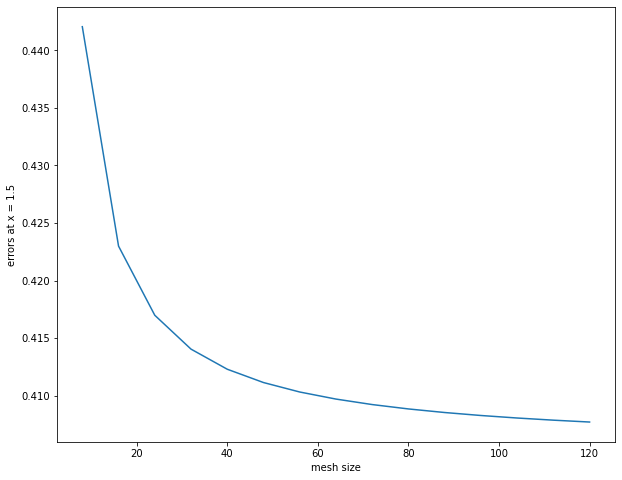

In [42]:
def setMeshSize(n):
    h = (2-1) / n
    x = np.linspace(1,2,n+1)
    # Get A
    A = np.zeros((n+1, n+1))
    A[0, 0] = 1
    A[n, n] = -2+h**2
    A[n, n-1] = 1
    for i in range(1, n):
        A[i, i-1] = 1
        A[i, i] = -2+h**2
        A[i, i+1] = 1

    # Get b
    b = np.zeros(n+1)
    for i in range(1, n+1):
        b[i] = h**2*np.log(x[i])
    
    return x, A, b

v = np.log(1.5)

n_s = []
errors = []

for n in range(8, 128, 8):
    x, A, b = setMeshSize(n)
    y = np.linalg.solve(A, b)
    n_s.append(n)
    e = v - y[-1]
    errors.append(e)
    
plt.figure(figsize = (10,8))
plt.plot(n_s, errors)
plt.xlabel('mesh size')
plt.ylabel('errors at x = 1.5')
plt.show()